# Import and explore data

In [1]:
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt

plt.close("all")

In [2]:
candy = pd.read_csv('candy-data.csv')
candy['competitorname'] = candy['competitorname'].replace("Õ", "'", regex=True)

In [3]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
candy.shape

(85, 13)

In [48]:
candy[['sugarpercent','pricepercent','winpercent']].describe()

,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000
mean,0.478647,0.468882,50.316764
std,0.282778,0.285740,14.714357
min,0.011000,0.011000,22.445341
25%,0.220000,0.255000,39.141056
50%,0.465000,0.465000,47.829754
75%,0.732000,0.651000,59.863998
max,0.988000,0.976000,84.180290


In [6]:
candy[candy.isna()].count()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [7]:
candy[candy.isnull()].count()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

# Transformation ( reversing one hot encoding )

In [8]:
def get_candy(row):
    for c in candy.columns:
        if row[c]==1:
            return c

candy.apply(get_candy, axis=1)

0     chocolate
1     chocolate
2          None
3          None
4        fruity
        ...    
80       fruity
81       fruity
82       fruity
83      caramel
84    chocolate
Length: 85, dtype: object

In [9]:
candy['types'] = candy.apply(get_candy, axis=1)

<Figure size 432x288 with 0 Axes>

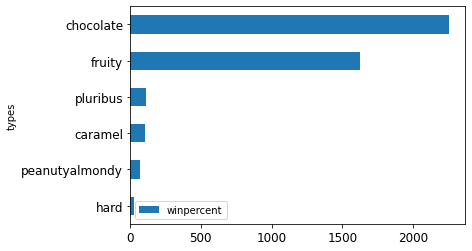

In [10]:
desc =candy.groupby('types')[['winpercent']].sum().sort_values(by ='winpercent')

plt.figure()
ax = desc.plot(kind="barh", fontsize=12)

<Figure size 432x288 with 0 Axes>

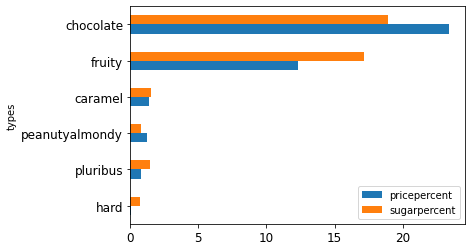

In [11]:
desc = candy.groupby('types')[['pricepercent','sugarpercent']].sum().sort_values(by ='pricepercent')

plt.figure()

ax = desc.plot(kind="barh", fontsize=12)


In [ ]:
import matplotlib.ticker as mtick
desc =candy.groupby('competitorname')[['winpercent']].sum().sort_values(by ='winpercent')
fig= plt.figure()

cmap = cm.get_cmap('Spectral')
ax = desc.plot(kind="barh", fontsize=15.,linestyle='--', cmap = cmap,
                   alpha=.25 , grid = True)


ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    
    x, y = p.get_xy() 
    ax.annotate(f'{width:.2f}%', (x + width, y + height*0.4), ha='center',fontsize=16)

plt.gcf().set_size_inches(20, 30)
plt.ylabel(ylabel='Competitor Name',fontsize=14)
plt.title('Winpercent', fontsize = 20)
ax.get_legend().remove()

#plt.show()
plt.savefig('winpercent-competitors.png')

<Figure size 432x288 with 0 Axes>

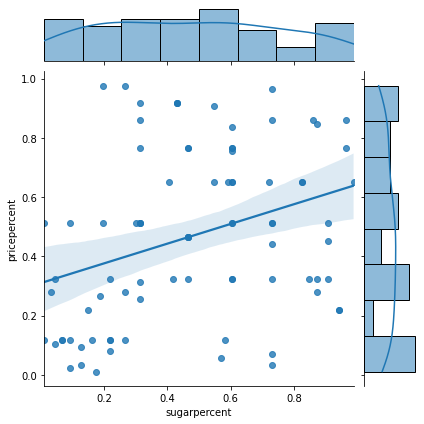

In [14]:
import seaborn as sns
sns.jointplot(data=candy, x="sugarpercent", y="pricepercent", kind="reg")

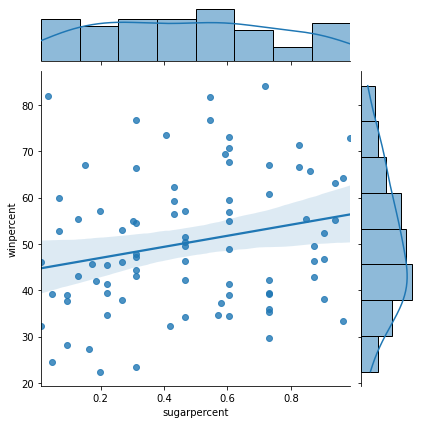

In [15]:
sns.jointplot(data=candy, x="sugarpercent", y="winpercent", kind="reg")

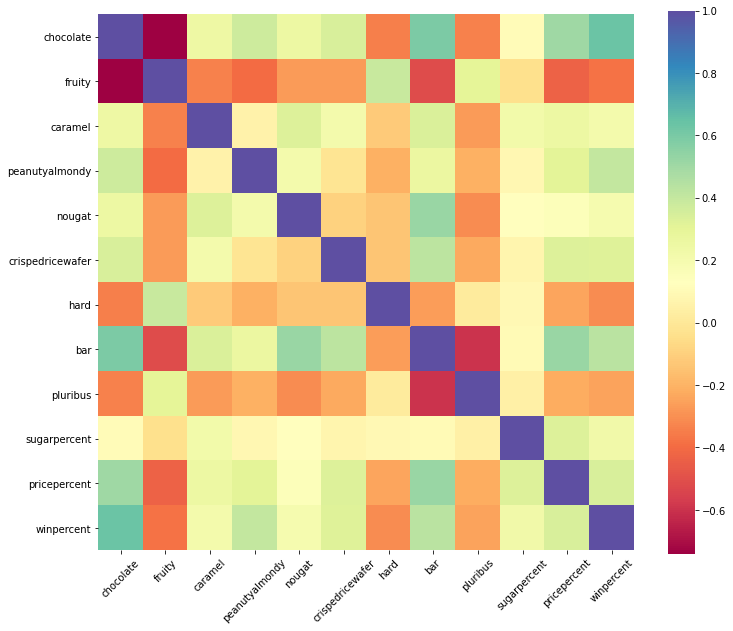

In [16]:
cor = candy[[ 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent']].corr()

f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(cor, square=True, cmap = cmap)
plt.xticks(rotation = 45)

plt.show()

In [17]:
#sns.pairplot(cor)

# Linear Regression

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
candy.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent', 'types'],
      dtype='object')

In [21]:
X = candy[['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent']]

y = candy['winpercent']

In [22]:
mfit = model.fit(X, y)

> The coefficient is a factor that describes the relationship with an unknown variable.
- Having `chocolate` in the candy , increases the average winpercent by 19,75 %
- Having `peanutyalmondy` flavor, increases the winpercent  by 10,1 %
- Increasing the `sugarpercent` by 1 unit, the winpercent increases by 9.1%
- Increasing the `pricepercent` by 1 unit, the winpercent decreases by 5.9%

In [23]:

#model.intercept_ ,
red_name, red_val = [], []
green_name, green_val = [], []

for c, x in zip(X.columns,model.coef_) :
    if x<0:        
        red_name.append(c)
        red_val.append(x)
    else:
        green_name.append(c)
        green_val.append(x)
    print(f'{c}: {x}')

chocolate: 19.74806697729201
fruity: 9.42232206651589
caramel: 2.2244813649345874
peanutyalmondy: 10.070688466648408
nougat: 0.8043306027718135
crispedricewafer: 8.918969809827132
hard: -6.165326502166487
bar: 0.44154009420600593
pluribus: -0.8544995421467818
sugarpercent: 9.08676286151108
pricepercent: -5.928361425545834


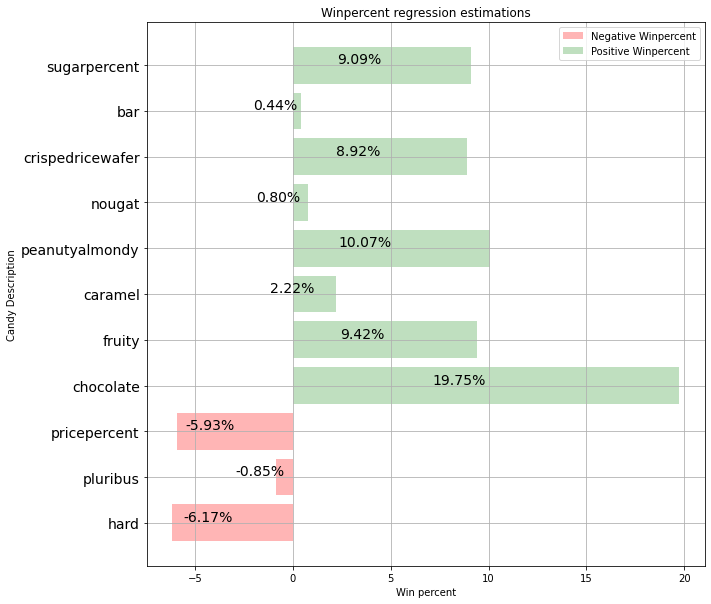

In [24]:
fig, ax = plt.subplots()

ax1 = ax.barh(red_name, red_val, label = "Negative Winpercent", color = 'r', alpha=.29)
ax2 = ax.barh(green_name, green_val, label = "Positive Winpercent", color = 'g', alpha=.25)
ax.grid(True)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    
    xi, yi = p.get_xy() 
    ax.annotate(f'{width:.2f}%', (xi +width/2, yi + height*0.55), ha='right',fontsize=14)
    
plt.gcf().set_size_inches(10, 10)
plt.legend()
plt.xlabel('Win percent')
plt.ylabel('Candy Description')
plt.title('Winpercent regression estimations')
plt.yticks(fontsize=14)

plt.show()

> The mean squared error tells you how close a regression line is to a set of points

In [25]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = mfit.predict(X)
y_true = y.to_numpy()
mean_squared_error(y_true, y_pred)

98.37927075848414

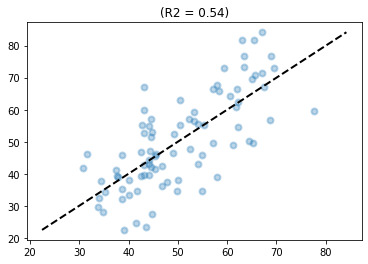

In [26]:
fig = plt.figure()

score = r2_score(y_true, y_pred)
plt.scatter(y_pred, y_true, lw=2, alpha=0.3)
plt.plot([min(y),max(y)], [min(y),max(y)], 
         linestyle='--', lw=2, color='black')
plt.title(label='(R2 = %0.2f)' % (score))
plt.show()

# Random Forest

In [27]:
candy.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent', 'types'],
      dtype='object')

> Exluding `sugarpercent` , `pricepercent`, because as we saw in the heatmap `sugarpercent` does not play a great role . About `pricepercent` we can easily deduce from experience and the regression model that the higher price the less the customer will prefer the product. 

### The following model will focus on the flavors and ingredients of the candy. 

In [28]:
labels = candy['winpercent']
features = candy[[ 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus','sugarpercent']]
feature_list = [ 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent']
features = np.array(features)

In [29]:
labels.shape , features.shape

((85,), (85, 10))

In [30]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [31]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (63, 10)
Training Labels Shape: (63,)
Testing Features Shape: (22, 10)
Testing Labels Shape: (22,)


In [32]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('sugarpercent')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  50.98


In [33]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 120, random_state = 42, min_samples_leaf = 3)
# Train the model on training data
rf.fit(train_features, train_labels);

In [34]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'units.')

Mean Absolute Error: 8.4 degrees.


### Compared to the basline prediction before the model is fitted, we can see that the mean squared error decreases up to 8.4 units from the baseline 50.98! 

In [35]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.37 %.


In [36]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: chocolate            Importance: 0.53
Variable: sugarpercent         Importance: 0.19
Variable: bar                  Importance: 0.1
Variable: peanutyalmondy       Importance: 0.06
Variable: fruity               Importance: 0.04
Variable: pluribus             Importance: 0.03
Variable: caramel              Importance: 0.02
Variable: crispedricewafer     Importance: 0.02
Variable: hard                 Importance: 0.01
Variable: nougat               Importance: 0.0


### How can we predict if the new candy is gonna be preferred by the customers? 

We can answer that with a 81% Accuracy by following the Random Forest. 
The higest `value` suggests more winpercent. 

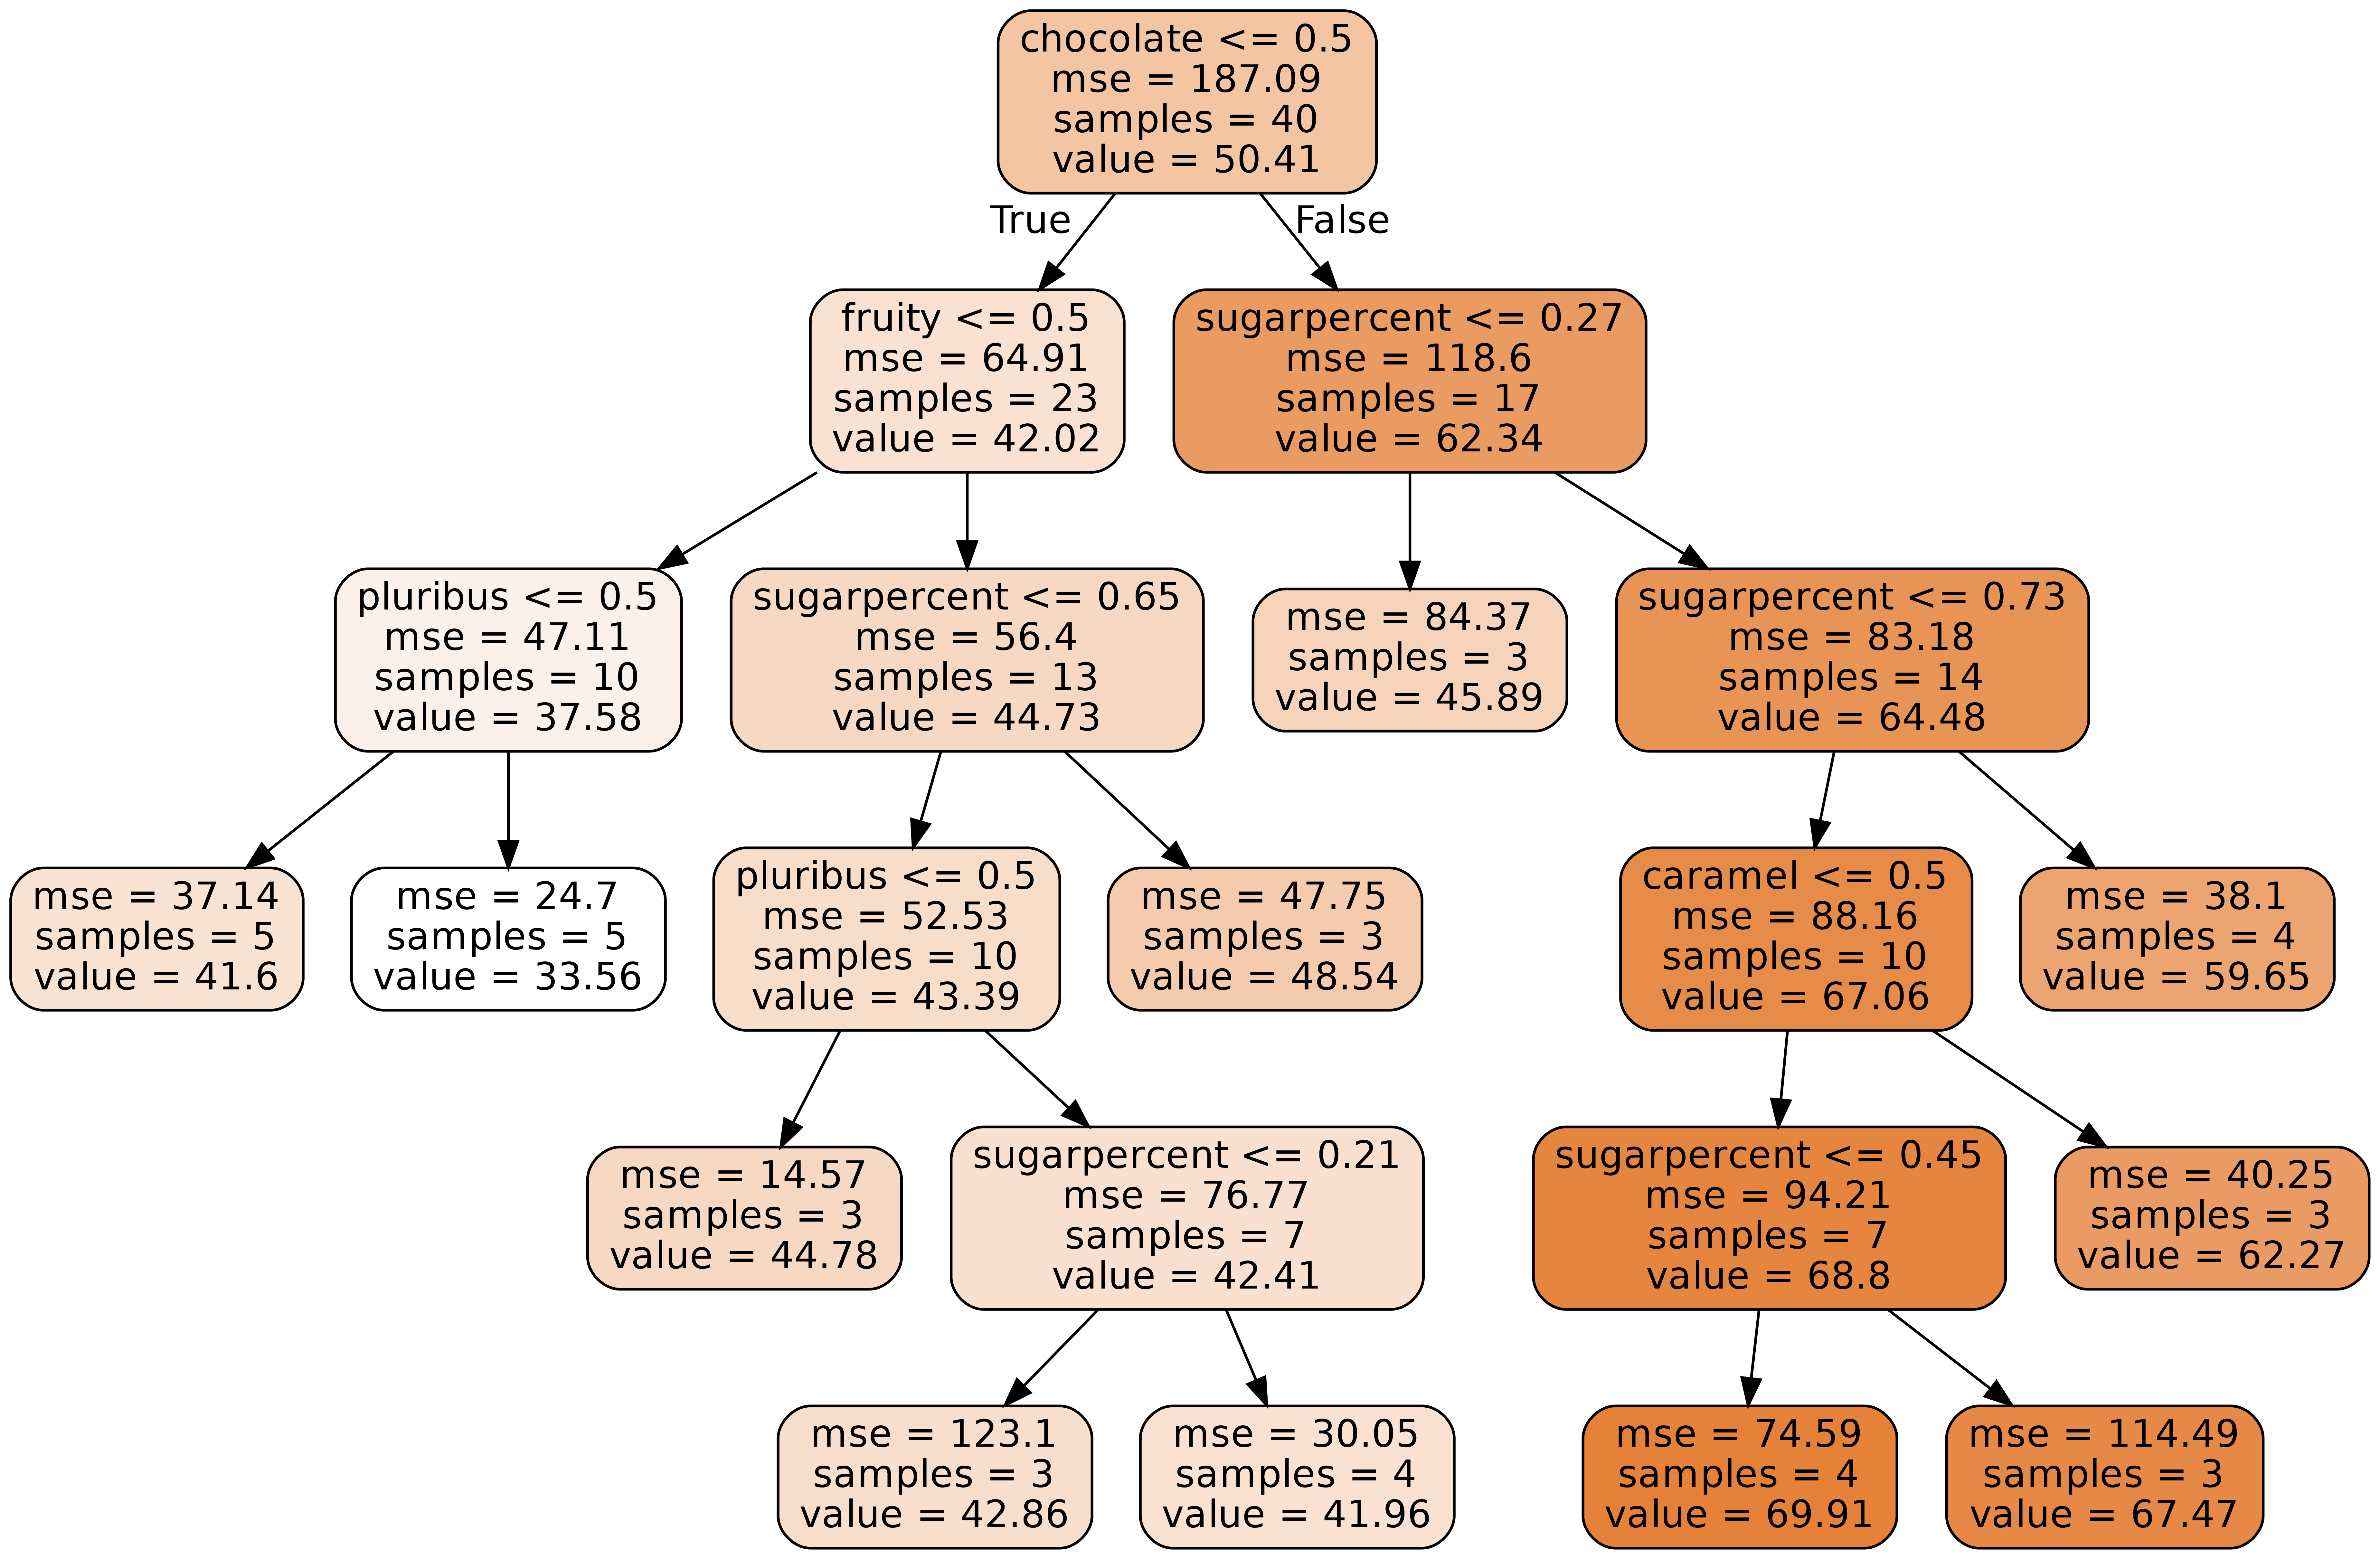

In [46]:

estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_list,
                class_names = ['winpercent'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')